# Understanding the Dataset

In [11]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_csv('Bank_Marketing_Original_Data.csv')
df.head

<bound method NDFrame.head of        Age           Job   Marital  Education Default  Balance Housing Loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  Day

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        45211 non-null  int64 
 1   Job        45211 non-null  object
 2   Marital    45211 non-null  object
 3   Education  45211 non-null  object
 4   Default    45211 non-null  object
 5   Balance    45211 non-null  int64 
 6   Housing    45211 non-null  object
 7   Loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   Day        45211 non-null  int64 
 10  Month      45211 non-null  object
 11  Duration   45211 non-null  int64 
 12  Campaign   45211 non-null  int64 
 13  Pdays      45211 non-null  int64 
 14  Previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  TARGET     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Task 1: Exploratory Data Analysis (EDA) 

## Summarize class imbalance

In [14]:
print(df['TARGET'].value_counts())
print(df['TARGET'].value_counts(normalize=True))

TARGET
no     39922
yes     5289
Name: count, dtype: int64
TARGET
no     0.883015
yes    0.116985
Name: proportion, dtype: float64


## Highlighted two interesting feature–target relationships with plots.

### Job vs Target relationship

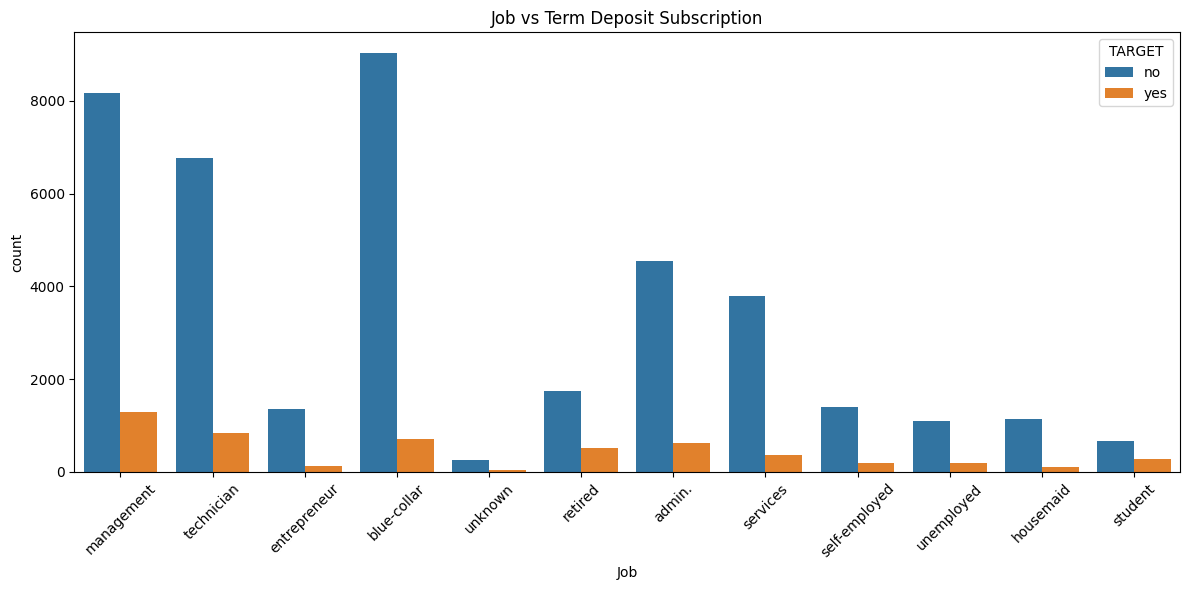

Job            TARGET
admin.         no        4540
               yes        631
blue-collar    no        9024
               yes        708
entrepreneur   no        1364
               yes        123
housemaid      no        1131
               yes        109
management     no        8157
               yes       1301
retired        no        1748
               yes        516
self-employed  no        1392
               yes        187
services       no        3785
               yes        369
student        no         669
               yes        269
technician     no        6757
               yes        840
unemployed     no        1101
               yes        202
unknown        no         254
               yes         34
dtype: int64


In [15]:
import seaborn as sns

plt.figure(figsize=(12, 6)) 
sns.countplot(x='Job', hue='TARGET', data=df)
plt.title("Job vs Term Deposit Subscription")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(df.groupby(['Job', 'TARGET']).size())

### Age Group vs Target relationship

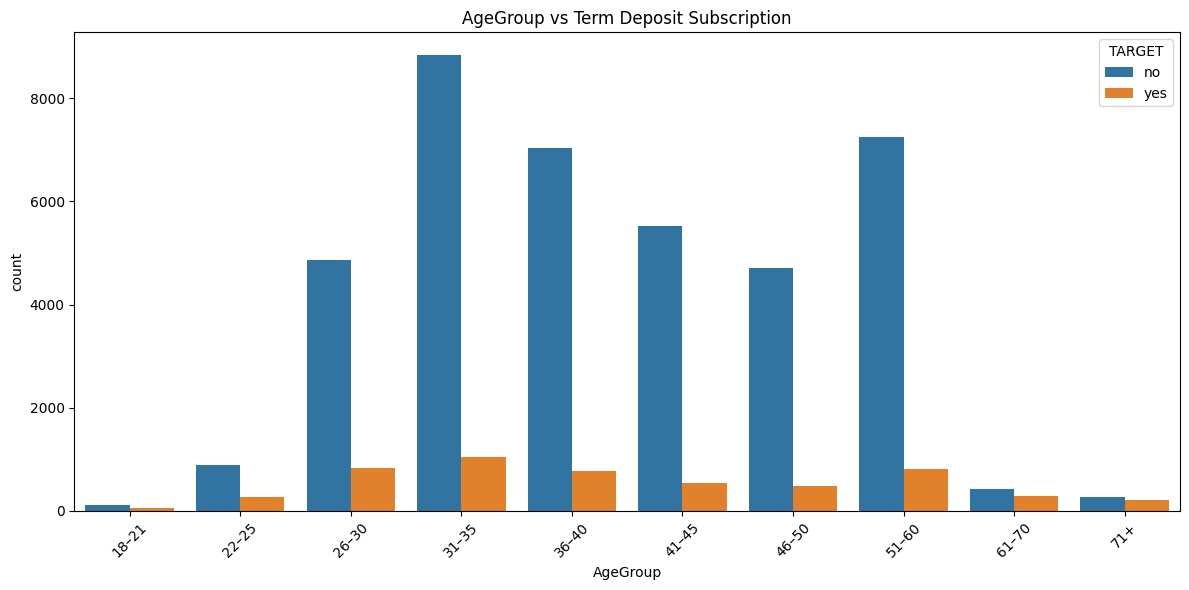

AgeGroup  TARGET
18–21     no         121
          yes         55
22–25     no         895
          yes        265
26–30     no        4869
          yes        825
31–35     no        8833
          yes       1044
36–40     no        7042
          yes        768
41–45     no        5513
          yes        533
46–50     no        4707
          yes        486
51–60     no        7256
          yes        811
61–70     no         417
          yes        284
71+       no         269
          yes        218
dtype: int64


C:\Users\yashg\AppData\Local\Temp\ipykernel_26700\3092505894.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(['AgeGroup', 'TARGET']).size())


In [16]:
import seaborn as sns

bins = [17, 21, 25, 30, 35, 40, 45, 50, 60, 70, 100]
labels = ['18–21', '22–25', '26–30', '31–35', '36–40', '41–45', '46–50', '51–60', '61–70', '71+']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

plt.figure(figsize=(12, 6)) 
sns.countplot(x='AgeGroup', hue='TARGET', data=df)
plt.title("AgeGroup vs Term Deposit Subscription")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(df.groupby(['AgeGroup', 'TARGET']).size())

# Task 2: Pre-processing pipeline

## Handle missing values

### In the dataset, some columns like 'job', 'contact', and 'poutcome' had values listed as "unknown", which I treated as missing values. Instead of dropping those rows, I chose to impute them using the mode, i.e., the most frequent valid category in each column.

### This replaced "unknown" values with the most common actual value (excluding "unknown" itself), which makes the data more consistent and helps the model learn better.

### I noticed that in the 'poutcome' column, over 80% of the values were "unknown", and only a small portion were "success", "failure", or "other". So instead of imputing those values using the mode (which would distort the actual distribution), I decided to replace "unknown" with "missing" only for my convenient further analysis. This way, the model can learn from that label if it has any predictive value, and I'm not forcing a wrong assumption into the data.

In [17]:
for col in ['Job', 'contact']:
    df[col] = df[col].replace('unknown', df[col].mode()[0])

for col in ['poutcome']:
    df[col] = df[col].replace('unknown', 'missing')


## Encode categorical variables

### Used One-hot encoding

In [18]:
df_encoded = pd.get_dummies(df)
df_encoded.head()

,Age,Balance,Day,Duration,Campaign,Pdays,Previous,Job_admin.,Job_blue-collar,Job_entrepreneur,...,AgeGroup_18–21,AgeGroup_22–25,AgeGroup_26–30,AgeGroup_31–35,AgeGroup_36–40,AgeGroup_41–45,AgeGroup_46–50,AgeGroup_51–60,AgeGroup_61–70,AgeGroup_71+
0,58,2143,5,261,1,-1,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,44,29,5,151,1,-1,0,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,33,2,5,76,1,-1,0,False,False,True,...,False,False,False,True,False,False,False,False,False,False
3,47,1506,5,92,1,-1,0,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,33,1,5,198,1,-1,0,False,True,False,...,False,False,False,True,False,False,False,False,False,False


## Train/validation split

In [19]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop(["TARGET_no", "TARGET_yes"], axis=1)
y = df_encoded['TARGET_yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Task 3: Baseline Model

## Train classic algorithm using Random  with two metrics "Acuuracy" and "F1 Score". A classification report is generated too for more metrices.

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.98      0.95      7989
        True       0.66      0.36      0.47      1054

    accuracy                           0.90      9043
   macro avg       0.79      0.67      0.71      9043
weighted avg       0.89      0.90      0.89      9043

Accuracy: 0.9039035718235099
F1 Score: 0.4665438919582566


# Task 4: Improvement step

## Class-Imbalance Technique

### I used SMOTE to fix the class imbalance because only around 12% of people said "yes". SMOTE creates fake but realistic "yes" examples by mixing real ones, which helps the model learn better. I chose this before doing hyperparameter tuning because tuning won’t help much if the data is already biased. Actually instead of just duplicating existing samples, it interpolates between real ones. After using SMOTE, the model’s recall and F1 score for the “yes” class improved, which is more useful than just high accuracy.

In [21]:
import os
os.environ["SCIPY_ARRAY_API"] = "1"

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_sm, y_train_sm)

from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.97      0.95      7989
        True       0.63      0.38      0.48      1054

    accuracy                           0.90      9043
   macro avg       0.78      0.68      0.71      9043
weighted avg       0.89      0.90      0.89      9043

Accuracy: 0.9018024991706293
F1 Score: 0.475177304964539
